# Import all the Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
from keras.utils import pad_sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Read the Datasets

In [2]:
train_df = pd.read_csv("/Users/bhavyakandhari/Downloads/train.csv", encoding="ISO-8859-1")
test_df = pd.read_csv("/Users/bhavyakandhari/Downloads/test.csv", encoding="ISO-8859-1")

In [3]:
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [4]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


# Basic Overview of the Data

In [5]:
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     274

In [6]:
train_df.shape

(27481, 10)

In [7]:
test_df.shape

(4815, 9)

In [8]:
train_df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [9]:
test_df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


# Data Cleaning

In [10]:
train_df = train_df[['text','sentiment']]
test_df = test_df[['text','sentiment']]

In [11]:
train_df['text'].fillna('',inplace=True)
test_df['text'].fillna('',inplace=True)

In [12]:
def sentiment_func(sentiment):
    if sentiment =='positive':
        return 0
    elif sentiment =='negative':
        return 1
    else:
        return 2

train_df['sentiment'] = train_df['sentiment'].apply(sentiment_func)
test_df['sentiment'] = test_df['sentiment'].apply(sentiment_func)

# Model Training

In [13]:
x_train = np.array(train_df['text'].tolist())
y_train = np.array(train_df['sentiment'].tolist())
x_test = np.array(test_df['text'].tolist())
y_test = np.array(test_df['sentiment'].tolist())

In [14]:
x_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [15]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [16]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [17]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [18]:
tokenizer = Tokenizer(num_words=20000)

In [19]:
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [20]:
len(tokenizer.word_index)

28614

In [21]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [22]:
x_train = pad_sequences(x_train, padding='post', maxlen=35)  # Set maxlen to 35
x_test = pad_sequences(x_test, padding='post', maxlen=35)  

In [23]:
x_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

In [24]:
x_train.shape

(27481, 35)

In [25]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4526 - loss: 1.0478 - val_accuracy: 0.7244 - val_loss: 0.7820
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6663 - loss: 0.7749 - val_accuracy: 0.7493 - val_loss: 0.6504
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7584 - loss: 0.6078 - val_accuracy: 0.7601 - val_loss: 0.6080
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8132 - loss: 0.5023 - val_accuracy: 0.7651 - val_loss: 0.6055
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8466 - loss: 0.4210 - val_accuracy: 0.7545 - val_loss: 0.6367
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8684 - loss: 0.3693 - val_accuracy: 0.7535 - val_loss: 0.6832
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8954 - loss: 0.3034 - val_accuracy: 0.7510 - val_loss: 0.7232
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9063 - loss: 0.2760 - val_accuracy: 0.

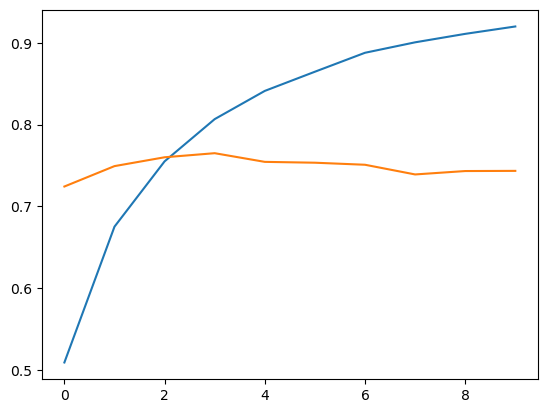

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Prediction

In [29]:
# Prediction 1
text = "Today feels like an endless cycle of missed opportunities and disappointments, casting a shadow over even the simplest joys."

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Negative Sentiment


In [30]:
# Prediction 2

text = "Each day is a fresh start, filled with endless possibilities to spread joy and make meaningful connections."

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Postive Sentiment
